In [6]:
#mount googlge drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<>:19: SyntaxWarning: invalid escape sequence '\C'
<>:19: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-3261234150.py:19: SyntaxWarning: invalid escape sequence '\C'
  print("\CSV info:")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV shape: (100, 4)

First rows:
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
\CSV info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   Y       100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB
None

X1: (100,)
X2: (100,)
X3: (100,)
Y: (100,)

PROBLEM 1:

Learning rate: 0.01
----------------------------------------

Training with X1:
Iteration 0: Cost = 5.524438
Iteration 100: Cost = 3.774216
Iteratio

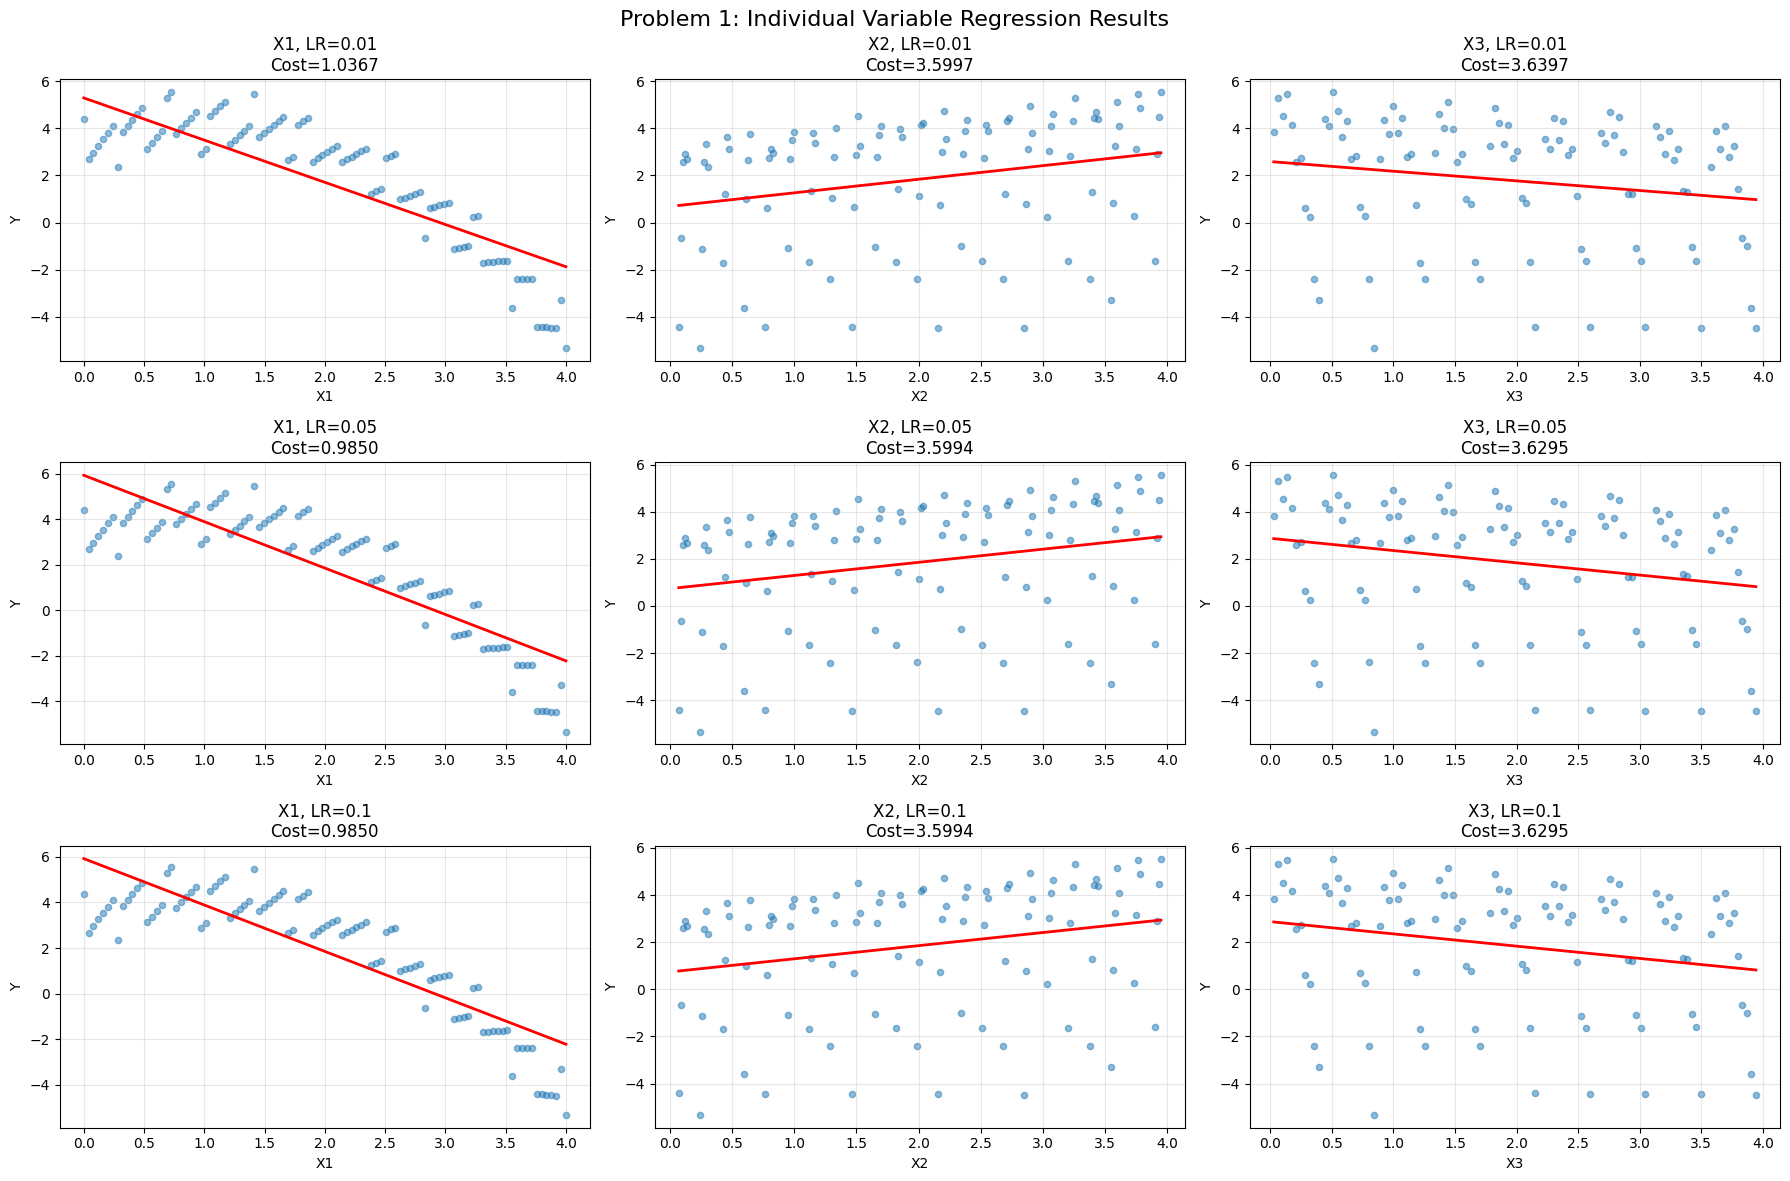

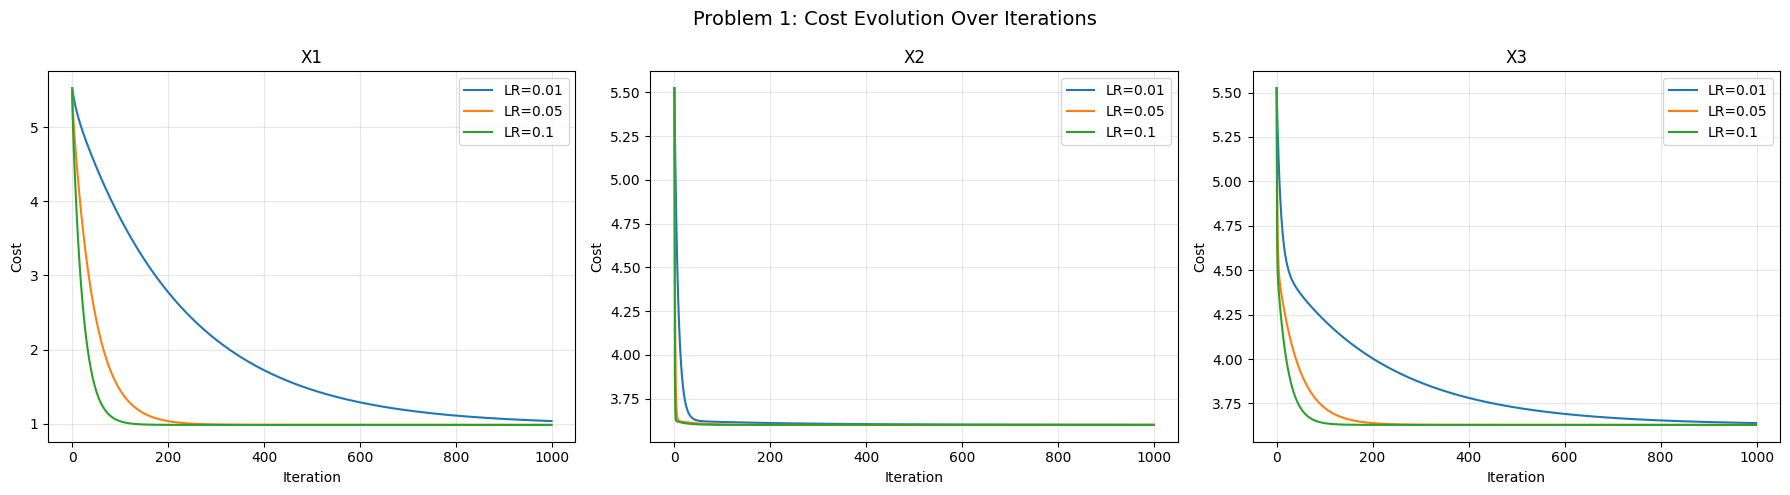


P1 SUMMARY

Learning Rate 0.01:
Variables ranked by final cost (highest to worst):
  1. X1: Cost = 1.036665, Model: y = 5.292947 + -1.791191 * x
  2. X2: Cost = 3.599674, Model: y = 0.687020 + 0.576695 * x
  3. X3: Cost = 3.639706, Model: y = 2.591187 + -0.409651 * x

Learning Rate 0.05:
Variables ranked by final cost (highest to worst):
  1. X1: Cost = 0.984993, Model: y = 5.927864 + -2.038304 * x
  2. X2: Cost = 3.599366, Model: y = 0.736054 + 0.557610 * x
  3. X3: Cost = 3.629451, Model: y = 2.871389 + -0.520470 * x

Learning Rate 0.1:
Variables ranked by final cost (highest to worst):
  1. X1: Cost = 0.984993, Model: y = 5.927949 + -2.038337 * x
  2. X2: Cost = 3.599366, Model: y = 0.736060 + 0.557608 * x
  3. X3: Cost = 3.629451, Model: y = 2.871422 + -0.520483 * x

P2: Every Variable:

Learning Rate: 0.01
----------------------------------------
Iteration 0: Cost = 5.524438
Iteration 100: Cost = 2.085496
Iteration 200: Cost = 1.714633
Iteration 300: Cost = 1.528593
Iteration 400

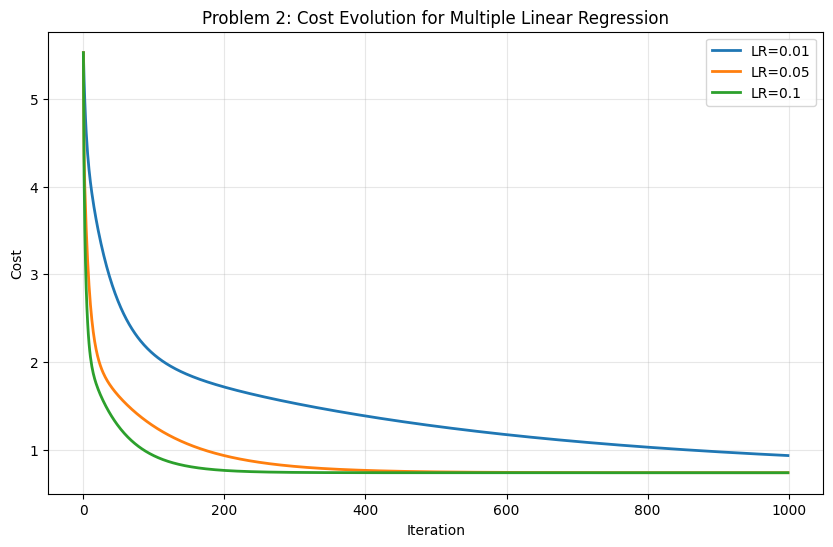


Best model with learning rate: 0.1:
Equation: y = 5.313936 + -2.003687*X1 + 0.532602*X2 + -0.265568*X3
Final cost: 0.738464

Predictions for new Data
For X1=1, X2=1, X3=1: Predicted Y = 3.577283
For X1=2, X2=0, X3=4: Predicted Y = 0.244291
For X1=3, X2=2, X3=1: Predicted Y = 0.102511

Complete Analysis Summary:

1. P1:
--------------------------------------------------
Best single variable: X1
Best learning rate: 0.1
Lowest cost: 0.984993
Model equation: y = 5.927949 + -2.038337 * x

2. P2:
--------------------------------------------------
Best learning rate: 0.1
Final cost: 0.738464
Model equation: y = 5.313936 + -2.003687*X1 + 0.532602*X2 + -0.265568*X3

3. COMPARISON:
--------------------------------------------------
Single variable model cost: 0.984993
Multiple variable model cost: 0.738464
Improvement with multiple variables: 25.03%

4. LEARNING RATE ANALYSIS:
--------------------------------------------------
Impact of learning rates on final cost:
  LR 0.01: Final cost = 0.93

In [7]:
#Linear Regression HW #1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

#Loading CSV File
#TA's please, update file path below with location of CSV File to run on one's own VM
file_path = '/content/drive/MyDrive/Year 4: 2025/Machine Learning/Homeworks/HW 1/D3.csv'
data = pd.read_csv(file_path)

#Analyze data
print("CSV shape:", data.shape)
print("\nFirst rows:")
print(data.head())
print("\CSV info:")
print(data.info())

#Variable Prep
X1 = data.iloc[:, 0].values  # First column
X2 = data.iloc[:, 1].values  # Second column
X3 = data.iloc[:, 2].values  # Third column
Y = data.iloc[:, 3].values   # Fourth column (Y Value)

print(f"\nX1: {X1.shape}")
print(f"X2: {X2.shape}")
print(f"X3: {X3.shape}")
print(f"Y: {Y.shape}")

#Problem 1:

class SimpleLinearRegression:
    #run linear regression with gradient decent algorithm for each of the explanatory variables in isolation

    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.theta0 = 0  # Intercept
        self.theta1 = 0  # Slope
        self.cost_history = []

    def predict(self, X):
        #predictions
        return self.theta0 + self.theta1 * X

    def compute_cost(self, X, y):
        #mean
        m = len(y)
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, X, y, num_iterations=1000):
        #trains linear regression model
        m = len(y)

        for i in range(num_iterations):
            predictions = self.predict(X)

            #Compute cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

            #gradients
            dtheta0 = (1/m) * np.sum(predictions - y)
            dtheta1 = (1/m) * np.sum((predictions - y) * X)

            #values updated
            self.theta0 -= self.learning_rate * dtheta0
            self.theta1 -= self.learning_rate * dtheta1

            #every 100 iterations reprint
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")

    def get_model_equation(self):
        return f"y = {self.theta0:.6f} + {self.theta1:.6f} * x"

#Problem 1: Train models for each explanatory variable individually

#Different learning rates to test
learning_rates = [0.01, 0.05, 0.1]
variables = [('X1', X1), ('X2', X2), ('X3', X3)]

results_problem1 = {}

print("\n" + "="*60)
print("PROBLEM 1:")
print("="*60)

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    print("-" * 40)

    results_problem1[lr] = {}

    for var_name, X_var in variables:
        print(f"\nTraining with {var_name}:")

        #train model
        model = SimpleLinearRegression(learning_rate=lr)
        model.fit(X_var, Y, num_iterations=1000)

        #results stored
        results_problem1[lr][var_name] = {
            'model': model,
            'final_cost': model.cost_history[-1],
            'equation': model.get_model_equation()
        }

        print(f"Final model: {model.get_model_equation()}")
        print(f"Final cost: {model.cost_history[-1]:.6f}")

#Plotting for P1
fig, axes = plt.subplots(len(learning_rates), 3, figsize=(18, 12))
fig.suptitle('Problem 1: Individual Variable Regression Results', fontsize=16)

for i, lr in enumerate(learning_rates):
    for j, (var_name, X_var) in enumerate(variables):
        model = results_problem1[lr][var_name]['model']

        #Regression Line
        ax = axes[i, j]
        ax.scatter(X_var, Y, alpha=0.5, s=20)

        x_range = np.linspace(X_var.min(), X_var.max(), 100)
        y_pred = model.theta0 + model.theta1 * x_range
        ax.plot(x_range, y_pred, 'r-', linewidth=2)

        ax.set_xlabel(var_name)
        ax.set_ylabel('Y')
        ax.set_title(f'{var_name}, LR={lr}\nCost={model.cost_history[-1]:.4f}')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Cost Evolution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Problem 1: Cost Evolution Over Iterations', fontsize=14)

for j, (var_name, X_var) in enumerate(variables):
    ax = axes[j]

    for lr in learning_rates:
        model = results_problem1[lr][var_name]['model']
        ax.plot(model.cost_history, label=f'LR={lr}')

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(f'{var_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best variable
print("\n" + "="*60)
print("P1 SUMMARY")
print("="*60)

for lr in learning_rates:
    print(f"\nLearning Rate {lr}:")
    costs = [(var, results_problem1[lr][var]['final_cost'])
             for var in ['X1', 'X2', 'X3']]
    costs.sort(key=lambda x: x[1])  # Sort by cost

    print("Variables ranked by final cost (highest to worst):")
    for i, (var, cost) in enumerate(costs, 1):
        equation = results_problem1[lr][var]['equation']
        print(f"  {i}. {var}: Cost = {cost:.6f}, Model: {equation}")

#------------------------------------------------------------------------------------------------------
#Problem 2: run linear regression with gradient descent algorithm using all three explanatory variables

class MultipleLinearRegression:

    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.theta = None
        self.cost_history = []

    def predict(self, X):
        return X @ self.theta

    def compute_cost(self, X, y):
        #mean
        m = len(y)
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, X, y, num_iterations=1000):
        #bias
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        m, n = X_with_bias.shape

        #intizliaze to zero
        self.theta = np.zeros(n)

        for i in range(num_iterations):
            predictions = self.predict(X_with_bias)

            #Costs calculation
            cost = self.compute_cost(X_with_bias, y)
            self.cost_history.append(cost)

            #Gradiants Calculation
            dtheta = (1/m) * X_with_bias.T @ (predictions - y)

            #Perimaters updated
            self.theta -= self.learning_rate * dtheta

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")

    def get_model_equation(self):
        #returns linear regression model
        return f"y = {self.theta[0]:.6f} + {self.theta[1]:.6f}*X1 + {self.theta[2]:.6f}*X2 + {self.theta[3]:.6f}*X3"

    def predict_new(self, X_new):
        if X_new.ndim == 1:
            X_new = X_new.reshape(1, -1)
        X_new_with_bias = np.column_stack([np.ones(len(X_new)), X_new])
        return self.predict(X_new_with_bias)

print("\n" + "="*60)
print("P2: Every Variable:")
print("="*60)

X_multiple = np.column_stack([X1, X2, X3])

results_problem2 = {}

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    print("-" * 40)

    model = MultipleLinearRegression(learning_rate=lr)
    model.fit(X_multiple, Y, num_iterations=1000)

    #store results
    results_problem2[lr] = {
        'model': model,
        'final_cost': model.cost_history[-1],
        'equation': model.get_model_equation()
    }

    print(f"Final model: {model.get_model_equation()}")
    print(f"\nFinal cost: {model.cost_history[-1]:.6f}")

#P2 cost evaluation
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    model = results_problem2[lr]['model']
    plt.plot(model.cost_history, label=f'LR={lr}', linewidth=2)

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Problem 2: Cost Evolution for Multiple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Analyze for best model
best_lr = min(learning_rates, key=lambda lr: results_problem2[lr]['final_cost'])
best_model = results_problem2[best_lr]['model']

print(f"\nBest model with learning rate: {best_lr}:")
print(f"Equation: {best_model.get_model_equation()}")
print(f"Final cost: {results_problem2[best_lr]['final_cost']:.6f}")

#Problem 2 part 4
print("\n" + "="*40)
print("Predictions for new Data")
print("="*40)

new_data_points = np.array([
    [1, 1, 1],
    [2, 0, 4],
    [3, 2, 1]
])

predictions = best_model.predict_new(new_data_points)

for i, (point, pred) in enumerate(zip(new_data_points, predictions)):
    print(f"For X1={point[0]}, X2={point[1]}, X3={point[2]}: Predicted Y = {pred:.6f}")

#Summarize and analyze results

print("\n" + "="*80)
print("Complete Analysis Summary:")
print("="*80)

print("\n1. P1:")
print("-" * 50)

# Find overall best single variable
best_single_results = []
for lr in learning_rates:
    for var in ['X1', 'X2', 'X3']:
        cost = results_problem1[lr][var]['final_cost']
        best_single_results.append((var, lr, cost, results_problem1[lr][var]['equation']))

best_single_results.sort(key=lambda x: x[2])
best_single_var, best_single_lr, best_single_cost, best_single_eq = best_single_results[0]

print(f"Best single variable: {best_single_var}")
print(f"Best learning rate: {best_single_lr}")
print(f"Lowest cost: {best_single_cost:.6f}")
print(f"Model equation: {best_single_eq}")

print(f"\n2. P2:")
print("-" * 50)
print(f"Best learning rate: {best_lr}")
print(f"Final cost: {results_problem2[best_lr]['final_cost']:.6f}")
print(f"Model equation: {best_model.get_model_equation()}")

print(f"\n3. Comparsion between two models:")
print("-" * 50)
print(f"Single variable model cost: {best_single_cost:.6f}")
print(f"Multiple variable model cost: {results_problem2[best_lr]['final_cost']:.6f}")
improvement = ((best_single_cost - results_problem2[best_lr]['final_cost']) / best_single_cost) * 100
print(f"Improvement with multiple variables: {improvement:.2f}%")

print(f"\n4.Learning Rate Analysis:")
print("-" * 50)
print("Impact of learning rates on final cost:")
for lr in sorted(learning_rates):
    cost = results_problem2[lr]['final_cost']
    print(f"  LR {lr}: Final cost = {cost:.6f}")